# Textmining with NLTK



This tutorial is partly based on [](https://medium.com/analytics-vidhya/twitter-sentiment-analysis-134553698978)

## Setup

For this tutorial, you will need to install [nltk](https://anaconda.org/anaconda/nltk) and [wordcloud](https://anaconda.org/conda-forge/wordcloud).



In [1]:
import nltk
import pandas as pd

## Import data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")
df

,Unnamed: 0,created_at,text,id,author_id
0,0,2021-12-09T15:02:04.000Z,Wir unterstützen die Impfkampagne #ZusammenGeg...,1468959134003326977,148370382
1,1,2021-12-09T12:01:25.000Z,Studierende der HdM haben Ulrich Land und Jörg...,1468913675348193285,148370382
2,2,2021-12-08T09:15:47.000Z,Die Hochschulen der Region Stuttgart laden unt...,1468509602295734272,148370382
3,3,2021-12-06T16:14:36.000Z,Seit Oktober 2021 ist Prof. Dr. Bernd Schmid-R...,1467890227121471488,148370382


## Lowercase

In [3]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.lower()
df

,Unnamed: 0,created_at,text,id,author_id
0,0,2021-12-09T15:02:04.000Z,wir unterstützen die impfkampagne #zusammengeg...,1468959134003326977,148370382
1,1,2021-12-09T12:01:25.000Z,studierende der hdm haben ulrich land und jörg...,1468913675348193285,148370382
2,2,2021-12-08T09:15:47.000Z,die hochschulen der region stuttgart laden unt...,1468509602295734272,148370382
3,3,2021-12-06T16:14:36.000Z,seit oktober 2021 ist prof. dr. bernd schmid-r...,1467890227121471488,148370382


## Tokenization

First, we remove noisy data like punctuations, hashtags, @ and others that are not alphanumeric. Only alphanumeric data are meaningful data that can help us in identifying the sentiments. 

To remove the noisy data, we will import [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) which will split the strings into substrings based on a [regular expression](https://www.w3schools.com/python/python_regex.asp). Use this [interactive regular expressions tool](https://regex101.com/) to learn more about regualr expressions 

- `\w+` matches Unicode word characters with one or more occurrences; this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [4]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df['text_token']


0    [wir, unterstützen, die, impfkampagne, zusamme...
1    [studierende, der, hdm, haben, ulrich, land, u...
2    [die, hochschulen, der, region, stuttgart, lad...
3    [seit, oktober, 2021, ist, prof, dr, bernd, sc...
Name: text_token, dtype: object

## Stopwords

Now that we have a tokenized version of the alphanumeric data, our next step will be to remove all the common words which aren’t useful for sentiment analysis. Words like about, above, other punctuations, conjunctions, etc are used a lot in any text data but aren’t useful especially for our purpose. These words are called stopwords. We will now remove the stopwords and make our tweets cleaner for analysis.


In [5]:
from nltk.corpus import stopwords
#nltk.download(‘stopwords’)

# make a list of german stopwords
stopwords = nltk.corpus.stopwords.words("german")

# extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [6]:
#remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df['text_token'] 

0    [unterstützen, impfkampagne, zusammengegencoro...
1    [studierende, hdm, ulrich, land, jörg, markste...
2    [hochschulen, region, stuttgart, laden, motto,...
3    [seit, oktober, 2021, prof, dr, bernd, schmid,...
Name: text_token, dtype: object

## Remove infrequent words

We remove all words that have a length <=2. In general, small words (length <=2 ) aren’t useful for sentiment analysis because they have no meaning. These most probably are noise in our analysis.

In [7]:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([w for w in x if len(w)>2]))

In [8]:
df['text_token']

0    unterstützen impfkampagne zusammengegencorona ...
1    studierende hdm ulrich land jörg marksteiner r...
2    hochschulen region stuttgart laden motto explo...
3    seit oktober 2021 prof bernd schmid ruhe studi...
Name: text_token, dtype: object

## Lemmatization

In [9]:
# nltk.download('wordnet')

In [10]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_token'] = df['text_token'].apply(wordnet_lem.lemmatize)

In [11]:
df['text_token']

0    unterstützen impfkampagne zusammengegencorona ...
1    studierende hdm ulrich land jörg marksteiner r...
2    hochschulen region stuttgart laden motto explo...
3    seit oktober 2021 prof bernd schmid ruhe studi...
Name: text_token, dtype: object

## Word cloud

[Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [12]:
all_words = ' '.join([word for word in df['text_token']])
all_words

'unterstützen impfkampagne zusammengegencorona slogan studieren wissen angepasst infos impfung stuttgart gibt frwtz25xai iwereajsrs studierende hdm ulrich land jörg marksteiner radiofeature sendung dok feature wdr erik hane film sendung planet zdf medienethik award meta 2021 ausgezeichnet gratulieren 0qoaaqvq8c lsvmeabfdi hochschulen region stuttgart laden motto explore the future reihe teens university schülerinnen schüler zwölf jahren immer freitags jeweils uhr veranstaltungen angeboten hdm 8oul4aq2bf bny2mxt8np seit oktober 2021 prof bernd schmid ruhe studiengang informationswissenschaften neuer prodekan fakultät information kommunikation hdm steht dekanat fakultät thema kommunikation 4iedizassi xrujfgczpw'

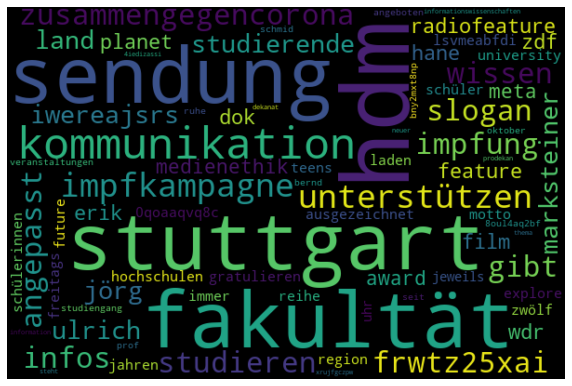

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Different style:

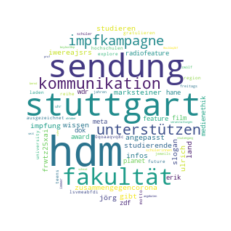

In [14]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## Frequency distributions

In [22]:
from nltk.probability import FreqDist

words = nltk.tokenize.word_tokenize(all_words)
fd = FreqDist(words)

### Most common words

In [23]:
fd.most_common(3)

[('hdm', 3), ('stuttgart', 2), ('sendung', 2)]

In [ ]:
# Obtain top 10 words
top_10 = fd.most_common(10)

<AxesSubplot:>

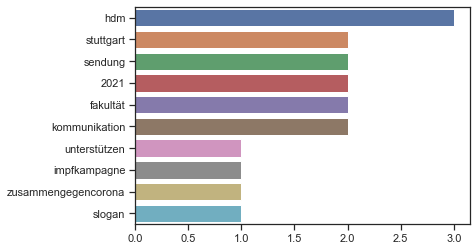

In [52]:
import seaborn as sns
sns.set_theme(style="ticks")

# Make pandas series for easier plotting
fdist = pd.Series(dict(top_10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
sns.barplot(y=fdist.index, x=fdist.values)

In [42]:
keywords_vc

,Count
wir unterstützen die impfkampagne #zusammengegencorona und haben unseren slogan studieren.wissen.machen. angepasst. \ninfos zur impfung in stuttgart gibt es unter:\nhttps://t.co/frwtz25xai https://t.co/iwereajsrs,1
studierende der hdm haben ulrich land und jörg marksteiner für ihr radiofeature in der sendung dok 5 - das feature (wdr 5) und erik hane für seinen film in der sendung planet e. (zdf) mit dem medienethik-award meta 2021 ausgezeichnet. wir gratulieren 👏: \nhttps://t.co/0qoaaqvq8c https://t.co/lsvmeabfdi,1
"die hochschulen der region stuttgart laden unter dem motto ""explore the future"" zur reihe teens university für schülerinnen und schüler ab zwölf jahren ein. immer freitags, jeweils um 16 uhr, werden dazu veranstaltungen angeboten, auch von der hdm:\nhttps://t.co/8oul4aq2bf https://t.co/bny2mxt8np",1
"seit oktober 2021 ist prof. dr. bernd schmid-ruhe aus dem studiengang informationswissenschaften neuer prodekan in der fakultät information und kommunikation an der hdm. er steht im dekanat der fakultät für das thema ""kommunikation"": \nhttps://t.co/4iedizassi https://t.co/xrujfgczpw",1


In [24]:
fd.tabulate(3)

      hdm stuttgart   sendung 
        3         2         2 


### Search words

In [25]:
fd["hdm"]

3

## Sentiment

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
